
###> **Proposé par :  Khelifi Bilel & Sliti Khalil , RT4_groupe1**
** Jeudi, 5 Mai 2022**

                    


---





####Dans ce TP, nous devons prédire le nombre d'avis positifs et négatifs à propos des films extraits du dataset IMDB de Kaggle en fonction des reviews et en utilisant différents modèles de classification.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords 
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import *
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam,Adagrad,RMSprop
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import tensorflow as tf
from tensorflow import keras

import gc

In [ ]:
#Importing DATASET
movie_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tpDL/IMDB Dataset 2.csv')

movie_reviews['review'] = movie_reviews['review'].str.lower() #transformer toutes les lettres en miniscules

In [ ]:
movie_reviews.isnull().sum()


review       0
sentiment    0
dtype: int64

In [ ]:
print(movie_reviews.shape)
movie_reviews.head(7)

(50000, 2)


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
5,"probably my all-time favorite movie, a story o...",positive
6,i sure would like to see a resurrection of a u...,positive


Exploratory data analysis


In [ ]:
movie_reviews.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,loved today's show!!! it was a variety and not...,positive
freq,5,25000


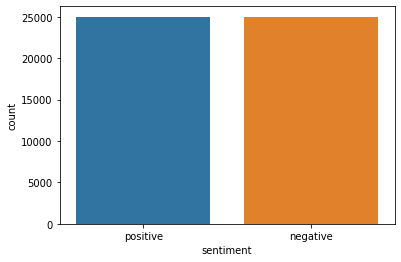

In [ ]:
import seaborn as sns
ax=sns.countplot(x="sentiment", data=movie_reviews)


In [ ]:
movie_reviews['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64


*    Nous pouvons constater que l'ensemble des données est parfaitement équilibré.

##**Preprocessing** the data

C'est peut-être l'une des étapes les plus importantes car les données que nous avons contiennent beaucoup de mots inutiles qui peuvent affecter négativement notre modèle et qui ne font qu'entraver les capacités de notre algorithme.
Nous allons donc nettoyer un peu les données de ce bruit. Nous allons supprimer les "stop words" de tous les reviews. \
**Les Stop Words** sont les mots anglais qui n'ajoutent pas beaucoup de sens à une phrase. Ils peuvent être ignorés sans modifier la classe. Par exemple, les mots comme the, he, have etc. 


##**Discovering Stop words in english:**

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
print(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

#**Preprocess data**

Removing stop words from our **movie_reviews**:

In [ ]:

from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

no_stop_words = remove_stop_words(movie_reviews['review'])

 
#print(no_stop_words)
#print(filtered_sentence)

La variable **filtered_sentence** est celle qui contient les reviews sans 'stop words'.

In [ ]:
def preprocess_text(sen):
  # Removing html tags
  sentence = remove_tags(sen)
  # Remove punctuations and numbers
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)
  # Single character removal
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
  # Removing multiple spaces
  sentence = re.sub(r'\s+', ' ', sentence)
  return sentence


TAG_RE = re.compile(r'<[^>]+>') 
def remove_tags(text):
  return TAG_RE.sub('', text)



*   La fonction **remove_stop_words** supprime les mots inutiles de tous les reviews. Un autre avantage de la suppression des mots d'arrêt est que l'incorporation de nombreux mots d'arrêt tels que "they'll" ou "you're" n'est pas disponible dans GloVe Embeddings, ce qui facilitera notre processus.
*   La deuxième fonction **remove_tags** sert à supprimer les balises HTML qui sont communes dans le texte, les balises HTML ressemblent à quelque chose comme <...>. Nous appliquons cette fonction en utilisant la fonction lambda.
Après cela, nous obtenons des reviews prêts pour être utilisés en apprentissage.






In [ ]:
X = []
sentences = list(no_stop_words)
for sen in sentences:
  X.append(preprocess_text(sen))  

In [ ]:
print('Le 4éme review: ',X[3])

Le 4éme review:  basically there family little boy jake thinks there zombie closet parents fighting time this movie slower soap opera suddenly jake decides become rambo kill zombie ok first going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots well playing parents descent dialogs shots jake ignore them 


On note la suppression de tous les stop words, les tags HTML, les ponctuations, les chiffres, les espaces multiples et les mots à une seule lettre.

Convertissons maintenant le sentiment du review en une forme binaire de 1 et 0, où 1 correspond à un sentiment "positif" et 0 à un sentiment "négatif".

In [ ]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))
y

array([1, 1, 1, ..., 0, 0, 0])

###Diviser le dataset en training et test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
len(X_test)


10000

#**Toknizer et préparer l'EmbeddingMatrix**

* Maintenant, nous allons ajouter des tokens pour tous les mots des données d'apprentissage et de test, donc le tokenizer indexe tous les mots du texte et chaque mot reçoit un index unique. Cela permet de créer un dictionnaire qui associe les mots à un index, ce qui nous sera très utile par la suite.

In [ ]:
max_features = 7000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index
print("Dictionnary:",words_to_index)

list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)

Dictionnary: {'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'it': 5, 'good': 6, 'the': 7, 'time': 8, 'even': 9, 'would': 10, 'story': 11, 'really': 12, 'see': 13, 'well': 14, 'much': 15, 'bad': 16, 'get': 17, 'people': 18, 'great': 19, 'also': 20, 'first': 21, 'made': 22, 'make': 23, 'could': 24, 'way': 25, 'movies': 26, 'think': 27, 'characters': 28, 'watch': 29, 'character': 30, 'films': 31, 'that': 32, 'seen': 33, 'two': 34, 'many': 35, 'plot': 36, 'never': 37, 'love': 38, 'life': 39, 'acting': 40, 'best': 41, 'know': 42, 'show': 43, 'little': 44, 'this': 45, 'ever': 46, 'man': 47, 'there': 48, 'better': 49, 'end': 50, 'scene': 51, 'still': 52, 'say': 53, 'and': 54, 'scenes': 55, 'something': 56, 'go': 57, 'back': 58, 'real': 59, 'watching': 60, 'thing': 61, 'm': 62, 'actors': 63, 'though': 64, 'years': 65, 'director': 66, 've': 67, 'funny': 68, 'old': 69, 'another': 70, 'actually': 71, 'work': 72, 'all': 73, 'makes': 74, 'nothing': 75, 'look': 76, 'going': 77, 'find': 78, 'lot': 79, 

Note: **words_to_index** est le dictionnaire qui associe les mots à leur index respectif.


Nous définissons maxLen qui est la longueur maximale d'une revue que nous allons utiliser pour l'apprentissage, pour les phrases de longueur <100 ,nous allons les remplir par des 0 afin que toutes les entrées aient la même longueur.

In [ ]:
# Adding 1 because of reserved 0 index 
vocab_size = len(tokenizer.word_index)+1
maxlen = 100
X_train = pad_sequences(list_tokenized_train, padding='post', maxlen=maxlen) #pad to the end of the sequences of X_train
X_test = pad_sequences(list_tokenized_test, padding='post', maxlen=maxlen)  #pad to the end of the sequences of X_test
print('vocab_size: ',vocab_size)

vocab_size:  92546


Les listes ont la même longueur = 100. De plus, la variable vocab_size contient maintenant une valeur 92546, ce qui signifie que le corpus contient 92546 mots uniques. GloVe pour créer notre matrice de fonctionnalités.
Nous utiliserons GloVe pour créer notre matrice de features. Dans le script suivant, nous chargeons GloVe et créons un dictionnaire qui contiendra des mots en tant que clés et leur liste d’embeddings correspondante en tant que valeurs.

###**creating a trained vector file for word2vec**

In [ ]:

import gensim
import nltk
nltk.download('punkt')
review_lines = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(str(X))]


num_features = 100  # Word vector dimensionality
min_word_count = 1 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(review_lines,
                          workers=num_workers,
                          size=num_features,
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)

print('Completed')
# # To make the model memory efficient
model.init_sims(replace=True)

#vocab size
words=list(model.wv.vocab)
print('Vocabulary size: %d'%len(words))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Training model....
Completed
Vocabulary size: 107905


save model

In [ ]:
filename="/content/drive/MyDrive/Colab Notebooks/tpDL/word2vec.txt"
model.wv.save_word2vec_format(filename,binary=False)

###**Creating embeddingMatrix for each Embedding Type**

In [ ]:
from numpy import array 
from numpy import asarray 
from numpy import zeros

def loadEmbeddingMatrix(embeddingMethod):

        # matrix we are going to experiment with
        if(embeddingMethod=="glove"):
            EMBEDDING_FILE="/content/drive/MyDrive/Colab Notebooks/tpDL/glove.6B.100d.txt"
            embed_size = 100
        elif(embeddingMethod=="word2vec"):
            EMBEDDING_FILE = "/content/drive/MyDrive/Colab Notebooks/tpDL/word2vec.txt"
            embed_size = 100
        elif(embeddingMethod=="fasttext"):
            EMBEDDING_FILE="/content/drive/MyDrive/Colab Notebooks/tpDL/wiki.simple.vec"
            embed_size = 300

        embeddings_dictionary = dict()
        # Transfer the embedding weights into a dictionary by iterating through every line of the file.
        f = open(EMBEDDING_FILE,encoding="utf8")
        for line in f:

          try:
            records = line.split()
            word = records[0]
            vector_dimensions = asarray(records[1:],dtype='float32') 
            embeddings_dictionary [word] = vector_dimensions
            
          
          except:
           f.__next__()
        f.close()
        embedding_matrix = zeros((vocab_size, embed_size))
        for word, index in tokenizer.word_index.items():
          embedding_vector = embeddings_dictionary.get(word) 
          if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
        del(embeddings_dictionary)

        gc.collect()
        
        # finally, return the embedding matrix
        return embedding_matrix

*   L'**EMBEDDING** représente généralement des codages géométriques de mots basés sur leur fréquence d'apparition dans un corpus de texte. Les diverses implémentations des incorporations de mots décrites ci-dessous diffèrent dans la manière dont elles sont construites.

---




1.   **Word2vec** a pour but de reconstruire les contextes linguistiques des mots. Il prend en entrée un grand corpus de texte et produit un espace vectoriel, généralement de plusieurs centaines de dimensions, chaque mot unique du corpus se voyant attribuer un vecteur correspondant dans l'espace. Les vecteurs de mots sont positionnés dans l'espace vectoriel de telle sorte que les mots qui partagent des contextes communs dans le corpus sont situés à proximité les uns des autres dans l'espace.

2.   **GLOVE** fonctionne de manière similaire à Word2Vec. Alors que Word2Vec est un modèle "prédictif" qui prédit le contexte d'un mot donné, GLOVE apprend en construisant une matrice de cooccurrence qui compte essentiellement la fréquence d'apparition d'un mot dans un contexte. Comme il s'agit d'une matrice gigantesque, on la factorisons pour obtenir une représentation de plus faible dimension.

3.   **FastText** est un peu différent des deux embeddings ci-dessus. Alors que Word2Vec et GLOVE traitent chaque mot comme la plus petite unité sur laquelle s'entraîner, FastText utilise les caractères n-gram comme plus petite unité. Par exemple, le mot vecteur "apple" peut être décomposé en vecteurs de mots distincts tels que "ap", "app", "ple". Le plus grand avantage de l'utilisation de FastText est qu'il génère de meilleures embeddings pour les mots rares, ou même les mots qui n'ont pas été vus pendant la formation parce que les vecteurs de caractères n-gram sont partagés avec d'autres mots. C'est quelque chose que Word2Vec et GLOVE ne peuvent pas réaliser.


---

#GLOVE EMBEDDING


---



*   On définit la matrice d'embedding, où tous les mots qui ne sont pas dans le dictionnaire GloVe sont affectés d'un vecteur zéro.
*   La matrice aura 100 colonnes où chaque colonne contiendra les embeddings GloVe pour les mots de notre corpus.


In [ ]:
embedding_matrix = loadEmbeddingMatrix('glove')

In [ ]:
embedding_matrix.shape

(92546, 100)

In [ ]:
num_epochs = 6

###**A. Classification avec un simple réseau de neurones**

In [ ]:

# Build the model
def simple_net(embedding_matrix):

  model = keras.Sequential([
      Embedding(vocab_size,embedding_matrix.shape[1], weights=[embedding_matrix],input_length=maxlen,trainable=False),
      #GaussianDropout(0.1),
      Flatten(),
      Dense(1, activation='sigmoid')
  ])
    # Compile the model
  model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['acc'])
    # Print the model summary
  model.summary()
  return model

In [ ]:
simple_model=simple_net(embedding_matrix)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 100)          9254600   
                                                                 
 flatten_19 (Flatten)        (None, 10000)             0         
                                                                 
 dense_19 (Dense)            (None, 1)                 10001     
                                                                 
Total params: 9,264,601
Trainable params: 10,001
Non-trainable params: 9,254,600
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Train the model
history = simple_model.fit(X_train, y_train,validation_split=0.2, batch_size=128,epochs=num_epochs,  
                    verbose=1,shuffle=True)

Epoch 1/6
250/250 [==============================] - 2s 5ms/step - loss: 0.5651 - acc: 0.7056 - val_loss: 0.5081 - val_acc: 0.7535
Epoch 2/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4563 - acc: 0.7870 - val_loss: 0.4983 - val_acc: 0.7617
Epoch 3/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4200 - acc: 0.8107 - val_loss: 0.5063 - val_acc: 0.7632
Epoch 4/6
250/250 [==============================] - 1s 4ms/step - loss: 0.3953 - acc: 0.8260 - val_loss: 0.5173 - val_acc: 0.7616
Epoch 5/6
250/250 [==============================] - 1s 3ms/step - loss: 0.3788 - acc: 0.8331 - val_loss: 0.5241 - val_acc: 0.7601
Epoch 6/6
250/250 [==============================] - 1s 3ms/step - loss: 0.3688 - acc: 0.8369 - val_loss: 0.5376 - val_acc: 0.7577


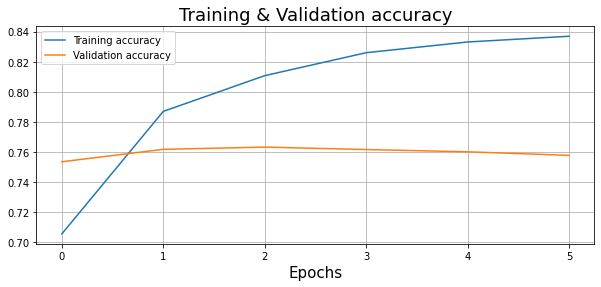

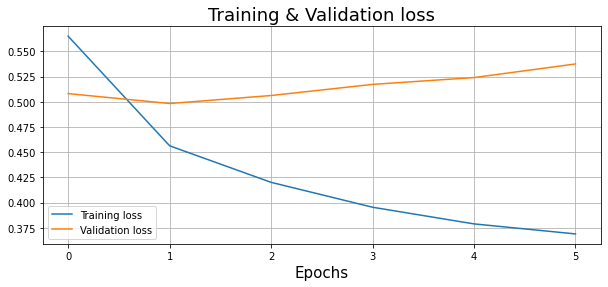

In [ ]:
#@title

import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.show()


In [ ]:
score = simple_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.5490 - acc: 0.7466
Test Score: 0.5490164756774902
Test Accuracy: 0.7465999722480774


In [ ]:
y_predict=simple_model.predict(X_test)
i=0
for val in y_predict:
  
  if (val<0.5):
    y_predict[i]=0
  else:
    y_predict[i]=1
  i+=1
print(y_predict)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


####Rapport de classification

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test, y_predict, target_names = ['negative','positive']))

              precision    recall  f1-score   support

    negative       0.72      0.80      0.76      4961
    positive       0.78      0.70      0.74      5039

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



###**B. Classification avec un réseau de neurones convolutionnel**

In [ ]:
# Build the model
def conv_net(weights=embedding_matrix ):
  model = keras.Sequential([
      Embedding(vocab_size, embedding_matrix.shape[1], weights=[weights],input_length=maxlen),
      Conv1D(128,5,activation="relu"),
      MaxPooling1D(),
      Flatten(),
      Dense(1, activation='sigmoid')
  ])
    # Compile the model
  model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['acc'])
    # Print the model summary
  #model.summary()
  return model

In [ ]:
conv_model=conv_net()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Train the model
history = conv_model.fit(X_train, y_train,validation_split=0.2, batch_size=128,epochs=num_epochs,  
                    verbose=1)

Epoch 1/6
250/250 [==============================] - 6s 21ms/step - loss: 0.4608 - acc: 0.7882 - val_loss: 0.3157 - val_acc: 0.8685
Epoch 2/6
250/250 [==============================] - 5s 20ms/step - loss: 0.2365 - acc: 0.9047 - val_loss: 0.3604 - val_acc: 0.8480
Epoch 3/6
250/250 [==============================] - 5s 20ms/step - loss: 0.1422 - acc: 0.9460 - val_loss: 0.4892 - val_acc: 0.8490
Epoch 4/6
250/250 [==============================] - 5s 20ms/step - loss: 0.0831 - acc: 0.9712 - val_loss: 0.6090 - val_acc: 0.8509
Epoch 5/6
250/250 [==============================] - 5s 20ms/step - loss: 0.0663 - acc: 0.9768 - val_loss: 0.8789 - val_acc: 0.8468
Epoch 6/6
250/250 [==============================] - 5s 20ms/step - loss: 0.0737 - acc: 0.9760 - val_loss: 1.0134 - val_acc: 0.8494


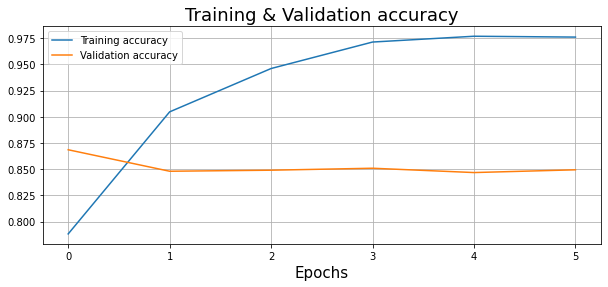

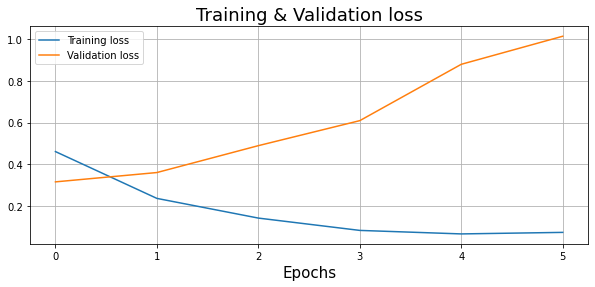

In [ ]:
#@title

import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.show()


In [ ]:
score = conv_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.9665 - acc: 0.8489
Test Score: 0.966529130935669
Test Accuracy: 0.8489000201225281


In [ ]:
y_predict=conv_model.predict(X_test)
i=0
for val in y_predict:
  
  if (val<0.5):
    y_predict[i]=0
  else:
    y_predict[i]=1
  i+=1
print(y_predict)

[[0.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test, y_predict, target_names = ['negative','positive']))

              precision    recall  f1-score   support

    negative       0.87      0.82      0.84      4961
    positive       0.83      0.88      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



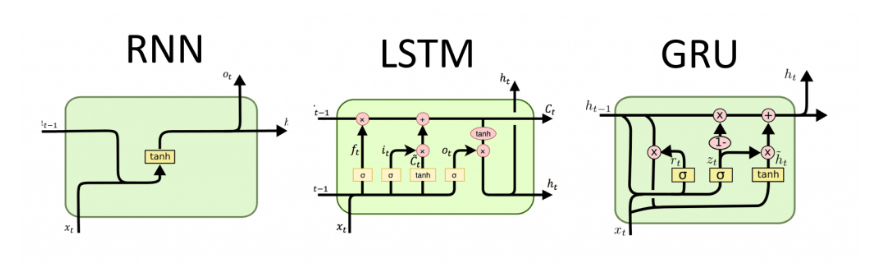

###**C. Classification avec un réseau de neurones récurrent (LSTM)**


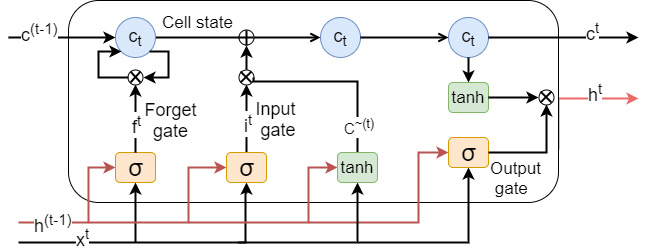

In [ ]:
# Build the model
def lstm_net(weights=embedding_matrix):
  model = keras.Sequential([
      Embedding(vocab_size, embedding_matrix.shape[1], weights=[embedding_matrix],input_length=maxlen),
      LSTM(128),
      Flatten(),
      Dense(1, activation='sigmoid')
  ])
  # Compile the model
  model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['acc'])
  # Print the model summary
  model.summary()
  return model

In [ ]:
lstm_model=lstm_net()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 100, 100)          9254600   
                                                                 
 lstm_6 (LSTM)               (None, 128)               117248    
                                                                 
 flatten_21 (Flatten)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9,371,977
Trainable params: 9,371,977
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Train the model
history = lstm_model.fit(X_train, y_train,validation_split=0.2, batch_size=128,epochs=num_epochs,  
                    verbose=1)

Epoch 1/6
250/250 [==============================] - 12s 39ms/step - loss: 0.4413 - acc: 0.7710 - val_loss: 0.3068 - val_acc: 0.8676
Epoch 2/6
250/250 [==============================] - 9s 38ms/step - loss: 0.2443 - acc: 0.9040 - val_loss: 0.3030 - val_acc: 0.8709
Epoch 3/6
250/250 [==============================] - 9s 36ms/step - loss: 0.1758 - acc: 0.9361 - val_loss: 0.3548 - val_acc: 0.8715
Epoch 4/6
250/250 [==============================] - 9s 36ms/step - loss: 0.1278 - acc: 0.9555 - val_loss: 0.3637 - val_acc: 0.8691
Epoch 5/6
250/250 [==============================] - 9s 36ms/step - loss: 0.0892 - acc: 0.9706 - val_loss: 0.4277 - val_acc: 0.8648
Epoch 6/6
250/250 [==============================] - 9s 36ms/step - loss: 0.0756 - acc: 0.9754 - val_loss: 0.4892 - val_acc: 0.8620


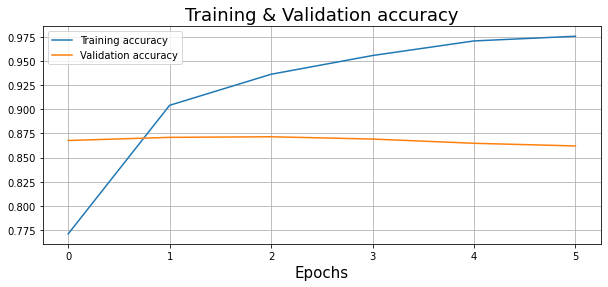

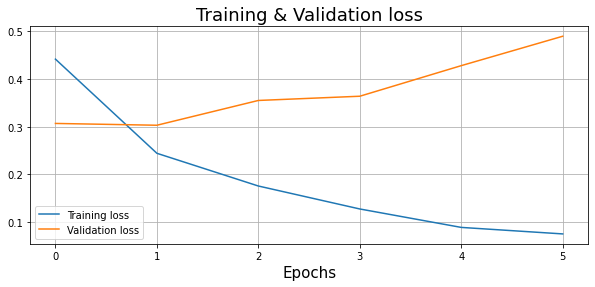

In [ ]:
#@title

import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.show()


In [ ]:
score = lstm_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.4722 - acc: 0.8665
Test Score: 0.4722227454185486
Test Accuracy: 0.8665000200271606


In [ ]:
y_predict=lstm_model.predict(X_test)
i=0
for val in y_predict:
  
  if (val<0.5):
    y_predict[i]=0
  else:
    y_predict[i]=1
  i+=1
print(y_predict.shape)

(10000, 1)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test, y_predict, target_names = ['negative','positive']))

              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      4961
    positive       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



###**D. Classification avec un réseau de neurones récurrent (GRU): Gated Reccurent Unit**


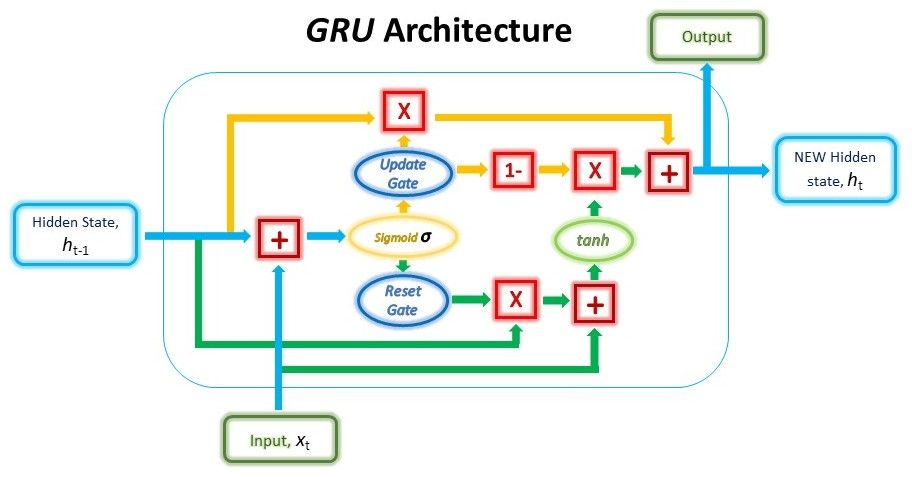

In [ ]:
# Build the model
def gru_net(weights=embedding_matrix):
  model = keras.Sequential([
      Embedding(vocab_size, embedding_matrix.shape[1], weights=[embedding_matrix],input_length=maxlen),
      GRU(128),
      Flatten(),
      Dense(1, activation='sigmoid')
  ])
  
  # Compile the model
  model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['acc'])
  # Print the model summary
  model.summary()
  return model

In [ ]:

gru_model=gru_net()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 100, 100)          9254600   
                                                                 
 gru_5 (GRU)                 (None, 128)               88320     
                                                                 
 flatten_22 (Flatten)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9,343,049
Trainable params: 9,343,049
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Train the model
history = gru_model.fit(X_train, y_train,validation_split=0.2, batch_size=128,epochs=num_epochs,  
                    verbose=1)

Epoch 1/6
250/250 [==============================] - 11s 37ms/step - loss: 0.3984 - acc: 0.8057 - val_loss: 0.2880 - val_acc: 0.8788
Epoch 2/6
250/250 [==============================] - 8s 34ms/step - loss: 0.2318 - acc: 0.9065 - val_loss: 0.3002 - val_acc: 0.8748
Epoch 3/6
250/250 [==============================] - 9s 35ms/step - loss: 0.1528 - acc: 0.9447 - val_loss: 0.3386 - val_acc: 0.8681
Epoch 4/6
250/250 [==============================] - 9s 34ms/step - loss: 0.1027 - acc: 0.9626 - val_loss: 0.3920 - val_acc: 0.8636
Epoch 5/6
250/250 [==============================] - 8s 34ms/step - loss: 0.0763 - acc: 0.9736 - val_loss: 0.4884 - val_acc: 0.8611
Epoch 6/6
250/250 [==============================] - 8s 34ms/step - loss: 0.0756 - acc: 0.9724 - val_loss: 0.4968 - val_acc: 0.8559


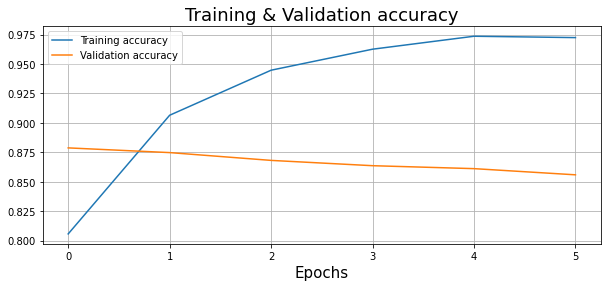

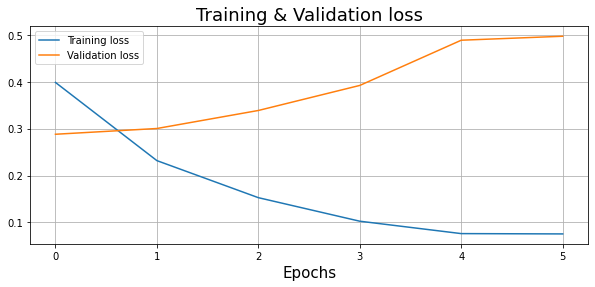

In [ ]:
#@title

import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.show()


In [ ]:
score = gru_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.4842 - acc: 0.8554
Test Score: 0.48420804738998413
Test Accuracy: 0.855400025844574


In [ ]:
y_predict=gru_model.predict(X_test)
i=0
for val in y_predict:
  
  if (val<0.5):
    y_predict[i]=0
  else:
    y_predict[i]=1
  i+=1
print(y_predict.shape)

(10000, 1)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test, y_predict, target_names = ['negative','positive']))

              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      4961
    positive       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#**Choisir une instance aléatoirement et prédire sa classe**
**(avec GloveEmbedding)**

In [ ]:
my_review=["this film is really amazing even if i didn't like it much at first"]

In [ ]:
my_review = tokenizer.texts_to_sequences(my_review)
my_review = pad_sequences(my_review, padding='post', maxlen=100)
my_review.shape

(1, 100)

**Comparer les 4 modèles**

* Simple réseau de neurones

In [ ]:
sentiment=""
simple_predictionw=simple_model.predict(my_review)
if (simple_predictionw<0.5):
  simple_prediction=0
  sentiment='negative'
else:
  simple_prediction=1
  sentiment='positive'
print(simple_predictionw,sentiment)

[[0.5618597]] positive


*  Réseau de neurones convolutionel

In [ ]:
sentiment=""
simple_predictionw=conv_model.predict(my_review)
if (simple_predictionw<0.5):
  simple_prediction=0
  sentiment='negative'
else:
  simple_prediction=1
  sentiment='positive'
print(simple_predictionw,sentiment)

[[0.9263831]] positive


* Réseau de neurones réccurent LSTM

In [ ]:
sentiment=""
simple_predictionw=lstm_model.predict(my_review)
if (simple_predictionw<0.5):
  simple_prediction=0
  sentiment='negative'
else:
  simple_prediction=1
  sentiment='positive'
print(simple_predictionw,sentiment)

[[0.97859293]] positive


* Réseau de neurones réccurent GRU

In [ ]:
sentiment=""
simple_predictionw=gru_model.predict(my_review)
if (simple_predictionw<0.5):
  simple_prediction=0
  sentiment='negative'
else:
  simple_prediction=1
  sentiment='positive'
print(simple_predictionw,sentiment)

[[0.99424285]] positive


**Conclusion**: Même si les 4 modèles ont correctement prédit la classe du review, mais ceux qui se basent sur **LSTM et GRU** étaient les plus surs du résultats avec 0.978 et 0.994, donc on peut confirmer que le réseau utilisant une couche  **GRU** est le plus performant pour cette tache de classification


---

#Word2Vec EMBEDDING


---



In [ ]:
embedding_matrix = loadEmbeddingMatrix('word2vec')

initialisation de **conv Net** avec les poids de word2vec 

In [ ]:
wv_conv_model=conv_net()
# Train the model
history = wv_conv_model.fit(X_train, y_train,validation_split=0.2, batch_size=128,epochs=num_epochs,  
                    verbose=1)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 7s 25ms/step - loss: 0.4298 - acc: 0.8030 - val_loss: 0.2983 - val_acc: 0.8790
Epoch 2/6
250/250 [==============================] - 5s 20ms/step - loss: 0.2267 - acc: 0.9103 - val_loss: 0.3209 - val_acc: 0.8674
Epoch 3/6
250/250 [==============================] - 5s 20ms/step - loss: 0.1438 - acc: 0.9456 - val_loss: 0.4868 - val_acc: 0.8432
Epoch 4/6
250/250 [==============================] - 5s 20ms/step - loss: 0.0856 - acc: 0.9692 - val_loss: 0.6243 - val_acc: 0.8585
Epoch 5/6
250/250 [==============================] - 5s 20ms/step - loss: 0.0622 - acc: 0.9772 - val_loss: 0.8305 - val_acc: 0.8583
Epoch 6/6
250/250 [==============================] - 5s 20ms/step - loss: 0.0568 - acc: 0.9803 - val_loss: 1.1205 - val_acc: 0.8365


In [ ]:
score = wv_conv_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.1710 - acc: 0.8362
Test Score: 1.1709550619125366
Test Accuracy: 0.8361999988555908


initialisation de **LSTM Net** avec les poids de word2vec 

In [ ]:
wv_lstm_model=lstm_net()
# Train the model
history = wv_lstm_model.fit(X_train, y_train,validation_split=0.2, batch_size=128,epochs=num_epochs,  
                    verbose=1)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 100, 100)          9254600   
                                                                 
 lstm_7 (LSTM)               (None, 128)               117248    
                                                                 
 flatten_24 (Flatten)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9,371,977
Trainable params: 9,371,977
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 12s 39ms/step - loss: 0.5037 - acc: 0.7237 - val_loss: 0.3227 - val_acc: 0.8616
Epoch 2/6
250/250 [==============================] - 9s 36ms/step - loss: 0.2584 - acc: 0.8954 - val_loss: 0.2948 - val_acc: 0.8744
Epoch 3/6
250/250 [==============================] - 9s 36ms/step - loss: 0.1791 - acc: 0.9313 - val_loss: 0.3349 - val_acc: 0.8711
Epoch 4/6
250/250 [==============================] - 9s 36ms/step - loss: 0.1256 - acc: 0.9554 - val_loss: 0.3797 - val_acc: 0.8599
Epoch 5/6
250/250 [==============================] - 9s 37ms/step - loss: 0.0959 - acc: 0.9671 - val_loss: 0.4623 - val_acc: 0.8585
Epoch 6/6
250/250 [==============================] - 9s 36ms/step - loss: 0.0687 - acc: 0.9770 - val_loss: 0.4765 - val_acc: 0.8562


In [ ]:
score = wv_lstm_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.4856 - acc: 0.8551
Test Score: 0.4855993092060089
Test Accuracy: 0.8550999760627747


initialisation de **GRU Net** avec les poids de word2vec 

In [ ]:
wv_gru_model=gru_net()
# Train the model
history = wv_gru_model.fit(X_train, y_train,validation_split=0.2, batch_size=128,epochs=num_epochs,  
                    verbose=1)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 100, 100)          9254600   
                                                                 
 gru_6 (GRU)                 (None, 128)               88320     
                                                                 
 flatten_25 (Flatten)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9,343,049
Trainable params: 9,343,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 11s 36ms/step - loss: 0.5184 - acc: 0.7113 - val_loss: 0.3133 - val_acc: 0.8708
Epoch 2/6
250/250 [==============================] - 8s 34ms/step - loss: 0.2539 - acc: 0.8979 - val_loss: 0.2872 - val_acc: 0.8789
Epoch 3/6
250/250 [==============================] - 8s 34ms/step - loss: 0.1735 - acc: 0.9349 - val_loss: 0.3716 - val_acc: 0.8605
Epoch 4/6
250/250 [==============================] - 8s 34ms/step - loss: 0.1290 - acc: 0.9520 - val_loss: 0.3885 - val_acc: 0.8626
Epoch 5/6
250/250 [==============================] - 8s 34ms/step - loss: 0.1305 - acc: 0.9504 - val_loss: 0.3955 - val_acc: 0.8535
Epoch 6/6
250/250 [==============================] - 8s 34ms/step - loss: 0.2113 - acc: 0.9154 - val_loss: 0.4984 - val_acc: 0.7774


In [ ]:
score = wv_gru_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 2s 8ms/step - loss: 0.4930 - acc: 0.7793
Test Score: 0.49300429224967957
Test Accuracy: 0.7792999744415283


---

#Fasttext EMBEDDING


---

FastText est une autre méthode de word Embedding qui est une extension du modèle word2vec. Au lieu d'apprendre directement des vecteurs pour les mots, fastText représente chaque mot comme un n-gramme de caractères.

In [ ]:
embedding_matrix = loadEmbeddingMatrix('fasttext')

In [ ]:
num_epochs=6

initialisation de **conv Net** avec les poids de **fasttext** 

In [ ]:

wv_conv_model=conv_net(embedding_matrix)
# Train the model
history = wv_conv_model.fit(X_train, y_train,validation_split=0.2, batch_size=128,epochs=num_epochs,shuffle=True,
                    verbose=1)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 13s 47ms/step - loss: 0.7091 - acc: 0.4983 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 2/6
250/250 [==============================] - 11s 43ms/step - loss: 0.6566 - acc: 0.6171 - val_loss: 0.5309 - val_acc: 0.7847
Epoch 3/6
250/250 [==============================] - 10s 40ms/step - loss: 0.3977 - acc: 0.8436 - val_loss: 0.3762 - val_acc: 0.8531
Epoch 4/6
250/250 [==============================] - 10s 40ms/step - loss: 0.2350 - acc: 0.9078 - val_loss: 0.4219 - val_acc: 0.8356
Epoch 5/6
250/250 [==============================] - 10s 42ms/step - loss: 0.1598 - acc: 0.9411 - val_loss: 0.5812 - val_acc: 0.8384
Epoch 6/6
250/250 [==============================] - 10s 41ms/step - loss: 0.1289 - acc: 0.9565 - val_loss: 0.7581 - val_acc: 0.8403


In [ ]:
score = wv_conv_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.7644 - acc: 0.8305
Test Score: 0.7644243240356445
Test Accuracy: 0.8305000066757202


initialisation de **LSTM Net** avec les poids de **fasttext**  

In [ ]:
wv_lstm_model=lstm_net(embedding_matrix)
# Train the model
history = wv_lstm_model.fit(X_train, y_train,validation_split=0.2, batch_size=128,epochs=num_epochs,  
                    verbose=1)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 100, 300)          27763800  
                                                                 
 lstm_8 (LSTM)               (None, 128)               219648    
                                                                 
 flatten_27 (Flatten)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 27,983,577
Trainable params: 27,983,577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 17s 61ms/step - loss: 0.4798 - acc: 0.7409 - val_loss: 0.3262 - val_acc: 0.8615
Epoch 2/6
250/250 [==============================] - 14s 58ms/step - loss: 0.2730 - acc: 0.8892 - val_loss: 0.3016 - val_acc: 0.8705
Epoch 3/6
250/250 [==============================] - 15s 59ms/step - loss: 0.2071 - acc: 0.9188 - val_loss: 0.3200 - val_acc: 0.8715
Epoch 4/6
250/250 [==============================] - 15s 58ms/step - loss: 0.1703 - acc: 0.9350 - val_loss: 0.3505 - val_acc: 0.8662
Epoch 5/6
250/250 [==============================] - 14s 58ms/step - loss: 0.1376 - acc: 0.9499 - val_loss: 0.3840 - val_acc: 0.8671
Epoch 6/6
250/250 [==============================] - 14s 58ms/step - loss: 0.1064 - acc: 0.9626 - val_loss: 0.4210 - val_acc: 0.8639


In [ ]:
score = wv_lstm_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.4217 - acc: 0.8660
Test Score: 0.4216506779193878
Test Accuracy: 0.8659999966621399


initialisation de **GRU Net** avec les poids de **fasttext**  

In [ ]:
wv_gru_model=gru_net(embedding_matrix)
# Train the model
history = wv_gru_model.fit(X_train, y_train,validation_split=0.2, batch_size=128,epochs=num_epochs,  
                    verbose=1)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 100, 300)          27763800  
                                                                 
 gru_7 (GRU)                 (None, 128)               165120    
                                                                 
 flatten_28 (Flatten)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 1)                 129       
                                                                 
Total params: 27,929,049
Trainable params: 27,929,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 16s 57ms/step - loss: 0.3843 - acc: 0.8113 - val_loss: 0.2816 - val_acc: 0.8830
Epoch 2/6
250/250 [==============================] - 14s 55ms/step - loss: 0.2332 - acc: 0.9076 - val_loss: 0.3085 - val_acc: 0.8695
Epoch 3/6
250/250 [==============================] - 14s 55ms/step - loss: 0.1781 - acc: 0.9322 - val_loss: 0.3594 - val_acc: 0.8662
Epoch 4/6
250/250 [==============================] - 14s 54ms/step - loss: 0.1841 - acc: 0.9286 - val_loss: 0.3836 - val_acc: 0.8435
Epoch 5/6
250/250 [==============================] - 14s 54ms/step - loss: 0.2131 - acc: 0.9125 - val_loss: 0.3896 - val_acc: 0.8470
Epoch 6/6
250/250 [==============================] - 14s 55ms/step - loss: 0.2032 - acc: 0.9204 - val_loss: 0.4012 - val_acc: 0.8424


In [ ]:
score = wv_gru_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1]) 

313/313 [==============================] - 3s 8ms/step - loss: 0.3946 - acc: 0.8453
Test Score: 0.39459535479545593
Test Accuracy: 0.845300018787384


---

#TF-IDF EMBEDDING


---- 



We will use TF-IDF (Term Frequency–Inverse Document Frequency), a numerical statistic that reflects how important a word is to a document in a collection or corpus by assigning some weight to it.



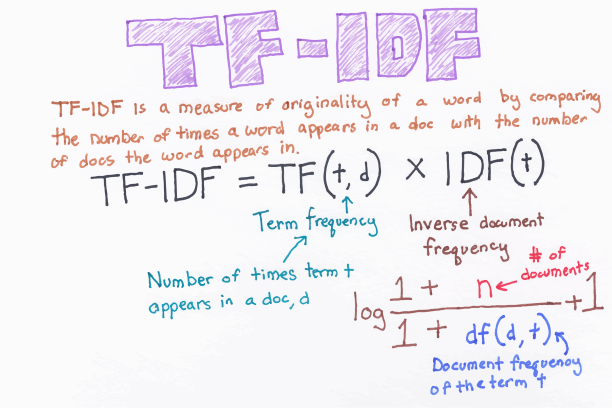

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( use_idf=True, max_features=4000)
X_train_transformed = vectorizer.fit_transform(X_train).toarray()
X_test_transformed = vectorizer.transform(X_test).toarray()

In [ ]:
X_train_transformed=X_train_transformed.reshape(X_train_transformed.shape[0],X_train_transformed.shape[1],1)
X_test_transformed=X_test_transformed.reshape(X_test_transformed.shape[0],X_test_transformed.shape[1],1)


In [ ]:
# Build the model
def conv_net():
  model = keras.Sequential([
      Conv1D(128,5,activation="relu"),
      MaxPooling1D(),
      Flatten(),
      Dense(1, activation='sigmoid')
  ])
    # Compile the model
  model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['acc'])
    # Print the model summary
  #model.summary()
  return model
tf_conv_model=conv_net()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = tf_conv_model.fit(X_train_transformed, y_train,batch_size=128,epochs=6,  
                    verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 36s 102ms/step - loss: 0.3849 - acc: 0.8206 - val_loss: 0.3072 - val_acc: 0.8676
Epoch 2/6
250/250 [==============================] - 25s 99ms/step - loss: 0.2724 - acc: 0.8849 - val_loss: 0.2988 - val_acc: 0.8746
Epoch 3/6
250/250 [==============================] - 24s 96ms/step - loss: 0.2512 - acc: 0.8977 - val_loss: 0.3101 - val_acc: 0.8670
Epoch 4/6
250/250 [==============================] - 23s 92ms/step - loss: 0.2397 - acc: 0.9028 - val_loss: 0.3143 - val_acc: 0.8714
Epoch 5/6
250/250 [==============================] - 23s 93ms/step - loss: 0.2271 - acc: 0.9108 - val_loss: 0.3208 - val_acc: 0.8639
Epoch 6/6
250/250 [==============================] - 23s 92ms/step - loss: 0.2186 - acc: 0.9129 - val_loss: 0.3507 - val_acc: 0.8583


In [ ]:
score = tf_conv_model.evaluate(X_test_transformed, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.3359 - acc: 0.8625
Test Score: 0.3358520269393921
Test Accuracy: 0.862500011920929


In [ ]:
# Build the model
def lstm_net():
  model = keras.Sequential([
      LSTM(128),

      Flatten(),
      Dense(1, activation='sigmoid')
  ])
  # Compile the model
  model.compile(loss='binary_crossentropy',optimizer=Adagrad(lr=0.001),metrics=['acc'])
  # Print the model summary
  #model.summary()
  return model

In [ ]:
tf_LSTM_model=lstm_net()
history = tf_LSTM_model.fit(X_train_transformed, y_train,batch_size=128,epochs=6,  
                    verbose=1,validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/6
250/250 [==============================] - 56s 219ms/step - loss: 0.6931 - acc: 0.5019 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/6
250/250 [==============================] - 54s 216ms/step - loss: 0.6931 - acc: 0.4988 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/6
250/250 [==============================] - 54s 217ms/step - loss: 0.6931 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/6
250/250 [==============================] - 54s 217ms/step - loss: 0.6931 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/6
250/250 [==============================] - 54s 218ms/step - loss: 0.6931 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/6
250/250 [==============================] - 55s 218ms/step - loss: 0.6931 - acc: 0.5013 - val_loss: 0.6931 - val_acc: 0.5000


In [ ]:
score = tf_LSTM_model.evaluate(X_test_transformed, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 29s 92ms/step - loss: 0.6922 - acc: 0.5040
Test Score: 0.692241907119751
Test Accuracy: 0.5040000081062317


In [ ]:
# Build the model
def gru_net():

  model = keras.Sequential([

      GRU(128),
      Flatten(),
      Dense(1, activation='sigmoid')
  ])
  
  # Compile the model
  model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['acc'])
  # Print the model summary
  #model.summary()
  return model

In [ ]:
tf_gru_model=gru_net()
history = tf_gru_model.fit(X_train_transformed, y_train,batch_size=128,epochs=6,  
                    verbose=1,validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/6
250/250 [==============================] - 53s 207ms/step - loss: 0.6925 - acc: 0.5078 - val_loss: 0.6912 - val_acc: 0.5164
Epoch 2/6
250/250 [==============================] - 57s 228ms/step - loss: 0.6915 - acc: 0.5099 - val_loss: 0.6913 - val_acc: 0.5176
Epoch 3/6
250/250 [==============================] - 51s 204ms/step - loss: 0.6912 - acc: 0.5151 - val_loss: 0.6918 - val_acc: 0.5029
Epoch 4/6
250/250 [==============================] - 52s 206ms/step - loss: 0.6914 - acc: 0.5124 - val_loss: 0.6910 - val_acc: 0.5109
Epoch 5/6
250/250 [==============================] - 51s 206ms/step - loss: 0.6909 - acc: 0.5185 - val_loss: 0.6903 - val_acc: 0.5279
Epoch 6/6
250/250 [==============================] - 53s 210ms/step - loss: 0.6903 - acc: 0.5201 - val_loss: 0.6873 - val_acc: 0.5480


In [ ]:
score = tf_gru_model.evaluate(X_test_transformed, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 16s 51ms/step - loss: 0.6888 - acc: 0.5448
Test Score: 0.6887840628623962
Test Accuracy: 0.5447999835014343


#Comparing Embedding methods

Les résultats d'accuracy pour **GLOVE**:


*   RNN+CNN : 0.848

*   LSTM: 0.866
*   GRU : 0.855

Les résultats d'accuracy pour **Word2Vec**:


*   RNN+CNN : 0.836:

*   LSTM: 0.855
*   GRU : 0.825




Les résultats d'accuracy pour **fasttext**:


*   RNN+CNN : 0.830 

*   LSTM: 0.865
*   GRU : 0.845




**   **LSTM parait le plus resistant parmi les 3 techniques du word Embedding, sinon les valeurs sont très similaires surout pour lSTM et GRU.**








Les résultats d'accuracy pour **TF-IDF**:


*   CNN : 0.862 

*   LSTM: 0.50
*   GRU : 0.544